In [1]:
from vadetisweb.anomaly_algorithms.detection.cluster import cluster_gaussian_mixture
from vadetisweb.anomaly_algorithms.detection.histogram import histogram
from vadetisweb.anomaly_algorithms.detection.svm import svm
from vadetisweb.anomaly_algorithms.detection.isolation_forest import isolation_forest
from vadetisweb.anomaly_algorithms.detection.lisa import lisa_pearson, lisa_dtw, lisa_geo
from vadetisweb.anomaly_algorithms.detection.robust_pca import robust_pca_huber_loss
from vadetisweb.models import DataSet, TimeSeries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
#input
def get_dataset(title):
    dataset = DataSet.objects.filter(title=title).first()
    training_dataset = dataset.training_dataset.all().first()
    return dataset, training_dataset

def get_ts_ids(dataset, ts_names):
    ts_ids = []
    time_series = dataset.timeseries_set.all()
    for ts in time_series:
        if ts.name in ts_names:
            ts_ids.append(ts.id)
            
    return ts_ids

In [4]:
def rpca_detection_l(df, df_class, df_train, df_train_class, delta=1, n_components=2, maximize_score='F1-Score', train_size=0.5):
    return robust_pca_huber_loss(df, df_class, df_train, df_train_class, delta=delta, n_components=n_components, maximize_score=maximize_score, train_size=train_size)

In [5]:
def histogram_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', train_size=0.5):
    return histogram(df, df_class, df_train, df_train_class, maximize_score=maximize_score, train_size=train_size)

In [6]:
def cluster_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_components=3, n_init=3, train_size=0.5):
    return cluster_gaussian_mixture(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_components=n_components, n_init=n_init, train_size=train_size)

In [7]:
def svm_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', nu=0.95, kernel='rbf', train_size=0.5):
    return svm(df, df_class, df_train, df_train_class, maximize_score=maximize_score, nu=nu, kernel=kernel, train_size=train_size)

In [8]:
def isolation_forest_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_jobs=-1, bootstrap=False, n_estimators=40, train_size=0.5):
    return isolation_forest(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_jobs=n_jobs, bootstrap=bootstrap, n_estimators=n_estimators, train_size=train_size)

In [2]:
# A2 Multi - TS NUMBER
dataset_name = 'A2 Yahoo'
ts_names = ['TS' + str(x) for x in [24, 66, 3, 10, 45, 17, 87, 73, 31, 38]]
#set_names = [ts_names[0:4], ts_names[0:5], ts_names[0:6], ts_names[0:7], ts_names[0:8], ts_names[0:9], ts_names[0:10]]
dimensions = [4, 5, 6, 7, 8, 9, 10]

In [10]:
# TS NUMBER - RPCA
dataset, training_dataset = get_dataset(dataset_name)
# Results array [nmi, rmse, f1]
r_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    scores, y_hat_results, df_common_class, info = rpca_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    r_results.append(result)
    
rpca_results = np.array(r_results)   

In [11]:
# TS NUMBER - HISTOGRAM
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
h_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    scores, y_hat_results, df_common_class, info = histogram_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    h_results.append(result)
    
histogram_results = np.array(h_results)    

In [12]:
# TS NUMBER - CLUSTER
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
c_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    scores, y_hat_results, df_common_class, info = cluster_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    c_results.append(result)
    
cluster_results = np.array(c_results)    

In [13]:
# TS NUMBER - SVM
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
s_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    scores, y_hat_results, df_common_class, info = svm_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    s_results.append(result)
    
svm_results = np.array(s_results)    

In [14]:
# TS NUMBER - ISOLATION FOREST
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
i_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    scores, y_hat_results, df_common_class, info = isolation_forest_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    i_results.append(result)

isolation_results = np.array(i_results)

In [3]:
scores = [{ 'title' : 'RPCA', 'scores' :  rpca_results }, 
          { 'title' : 'Histogram', 'scores' :  histogram_results }, 
          { 'title' : 'Cluster', 'scores' :  cluster_results }, 
          { 'title' : 'SVM', 'scores' :  svm_results }, 
          { 'title' : 'Isolation Forest', 'scores' :  isolation_results }
         ]

NameError: name 'rpca_results' is not defined

In [16]:
print(scores)

[{'title': 'RPCA', 'scores': array([[0.75 , 0.011, 0.867],
       [0.254, 0.139, 0.407],
       [0.837, 0.007, 0.937],
       [0.191, 0.19 , 0.354],
       [0.134, 0.249, 0.289],
       [0.096, 0.127, 0.318],
       [0.114, 0.106, 0.348]])}, {'title': 'Histogram', 'scores': array([[0.011, 0.507, 0.048],
       [0.011, 0.531, 0.05 ],
       [0.006, 0.63 , 0.075],
       [0.008, 0.69 , 0.075],
       [0.01 , 0.7  , 0.074],
       [0.011, 0.911, 0.105],
       [0.002, 0.896, 0.104]])}, {'title': 'Cluster', 'scores': array([[0.366, 0.032, 0.489],
       [0.154, 0.042, 0.211],
       [0.404, 0.034, 0.538],
       [0.609, 0.021, 0.754],
       [0.897, 0.004, 0.959],
       [0.897, 0.004, 0.959],
       [0.897, 0.004, 0.959]])}, {'title': 'SVM', 'scores': array([[0.31 , 0.035, 0.419],
       [0.325, 0.034, 0.52 ],
       [0.31 , 0.041, 0.554],
       [0.109, 0.097, 0.343],
       [0.079, 0.121, 0.295],
       [0.07 , 0.115, 0.281],
       [0.052, 0.089, 0.241]])}, {'title': 'Isolation Forest'

In [3]:
scores = [{'title': 'RPCA', 'scores': np.array([[0.75 , 0.011, 0.867],
       [0.254, 0.139, 0.407],
       [0.837, 0.007, 0.937],
       [0.191, 0.19 , 0.354],
       [0.134, 0.249, 0.289],
       [0.096, 0.127, 0.318],
       [0.114, 0.106, 0.348]])}, {'title': 'Histogram', 'scores': np.array([[0.011, 0.507, 0.048],
       [0.011, 0.531, 0.05 ],
       [0.006, 0.63 , 0.075],
       [0.008, 0.69 , 0.075],
       [0.01 , 0.7  , 0.074],
       [0.011, 0.911, 0.105],
       [0.002, 0.896, 0.104]])}, {'title': 'Cluster', 'scores': np.array([[0.366, 0.032, 0.489],
       [0.154, 0.042, 0.211],
       [0.404, 0.034, 0.538],
       [0.609, 0.021, 0.754],
       [0.897, 0.004, 0.959],
       [0.897, 0.004, 0.959],
       [0.897, 0.004, 0.959]])}, {'title': 'SVM', 'scores': np.array([[0.31 , 0.035, 0.419],
       [0.325, 0.034, 0.52 ],
       [0.31 , 0.041, 0.554],
       [0.109, 0.097, 0.343],
       [0.079, 0.121, 0.295],
       [0.07 , 0.115, 0.281],
       [0.052, 0.089, 0.241]])}, {'title': 'Isolation Forest', 'scores': np.array([[0.116, 0.08 , 0.345],
       [0.075, 0.189, 0.256],
       [0.03 , 0.168, 0.201],
       [0.044, 0.497, 0.165],
       [0.026, 0.421, 0.162],
       [0.025, 0.508, 0.151],
       [0.042, 0.507, 0.163]])}]

In [10]:
def generate_nmi_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,0], marker=".", label=title)
    ax.set_ylabel('Score (NMI)')
    ax.set_xlabel('Number of TS')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    plt.xticks(np.arange(min(dimension), max(dimension)+1, 1))
    ax.set_ylim([-0.1, 1.05])
    plt.yticks(np.arange(0, 1.1, 0.1))
    
    fig.tight_layout()
    plt.show()

In [11]:
def generate_rmse_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,1], marker=".", label=title)
    ax.set_ylabel('Score (RMSE)')
    ax.set_xlabel('Number of TS')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    plt.xticks(np.arange(min(dimension), max(dimension)+1, 1))
    ax.set_ylim([-0.1, 1.05])
    plt.yticks(np.arange(0, 1.1, 0.1))
    
    fig.tight_layout()
    plt.show()

In [12]:
def generate_f1_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,2], marker=".", label=title)
    ax.set_ylabel('Score (F1)')
    ax.set_xlabel('Number of TS')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    plt.xticks(np.arange(min(dimension), max(dimension)+1, 1))
    ax.set_ylim([-0.1, 1.05])
    plt.yticks(np.arange(0, 1.1, 0.1))
    
    fig.tight_layout()
    plt.show()

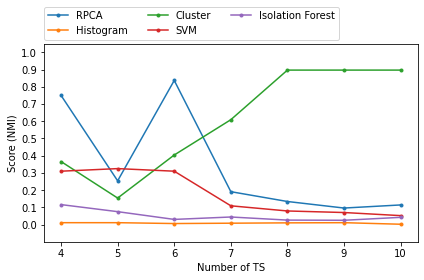

In [13]:
generate_nmi_line_chart(dimensions, scores)

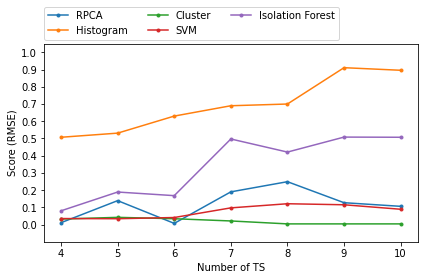

In [14]:
generate_rmse_line_chart(dimensions, scores)

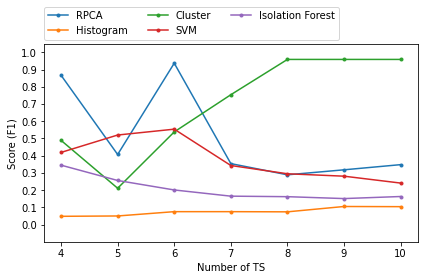

In [15]:
generate_f1_line_chart(dimensions, scores)